In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from datetime import datetime
import plotly.offline as pyo
## read the file 
df = pd.read_csv("soil.csv")
df['date']= pd.to_datetime(df['date'])
df['Hour']=df['date'].apply(lambda time: time.hour)
df['Month']=df['date'].apply(lambda time: time.month)
df['Year']=df['date'].apply(lambda time: time.year)
df['DOW']=df['date'].dt.day_name()

df2= df.groupby(by = ["DOW", "Hour"]).mean()['segment1(10-30cm)'].unstack()
df2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DOW,,,,,,,,,,,,,,,,,,,,,
Friday,69.010362,69.011449,69.016304,68.996449,68.996449,68.985942,69.018696,69.110290,69.097826,69.044493,...,69.120362,69.213261,69.217029,69.207971,69.207754,69.420519,69.179855,69.172246,69.160145,69.162971
Monday,68.956111,68.974444,69.080347,69.201806,69.253706,69.211357,69.160556,69.154236,69.125972,69.090347,...,69.006806,68.980139,68.950139,68.936528,68.942708,68.976597,69.246944,69.392778,69.382639,69.362222
Saturday,69.140580,69.122681,69.098478,69.093478,69.082681,69.051159,69.031087,69.021159,68.984348,68.957101,...,68.841377,68.950000,69.264203,69.301014,69.318623,68.760522,68.111000,69.328333,69.325362,69.346159
Sunday,69.369928,69.376304,69.365072,69.358551,69.368043,69.353478,69.338406,69.319130,69.243478,69.263913,...,68.982101,68.932754,68.917101,68.860870,68.846159,68.840652,68.845507,68.840725,68.841884,68.835797
Thursday,69.264565,69.246014,69.220580,69.206304,69.190942,69.190942,69.164565,69.169420,69.202536,69.265580,...,69.107826,69.247259,69.008913,69.013037,68.955797,69.046131,69.310226,68.986667,69.000145,68.995435
Tuesday,68.516957,68.525725,68.554058,68.605942,68.723913,68.814565,68.784493,68.745652,68.720652,68.723696,...,69.405362,69.471522,69.444088,69.457669,69.406377,69.414130,69.429058,69.438841,69.432101,69.432609
Wednesday,69.438633,69.463913,69.455072,69.426884,69.441014,69.446884,69.425580,69.399565,69.266045,69.302574,...,69.494586,69.483723,69.891504,69.286884,69.259638,69.274058,69.332174,69.340507,69.320000,69.289275


<AxesSubplot:xlabel='Hour', ylabel='DOW'>

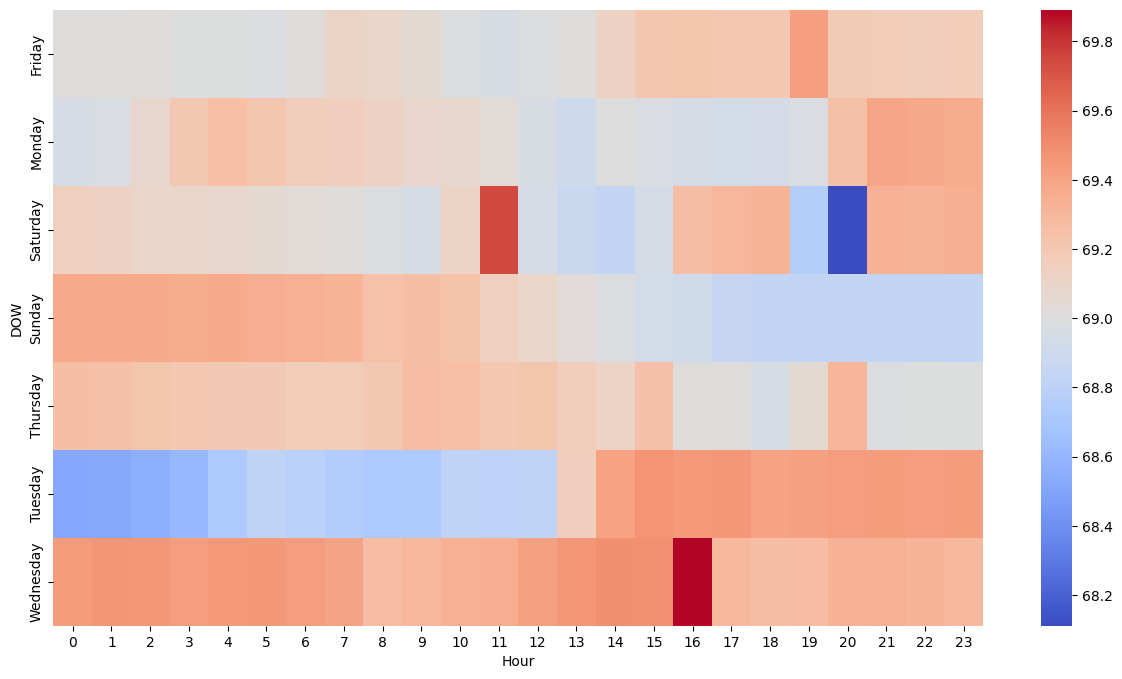

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (15,8))
sns.heatmap(df2,cmap= "coolwarm")

<Figure size 1500x800 with 0 Axes>

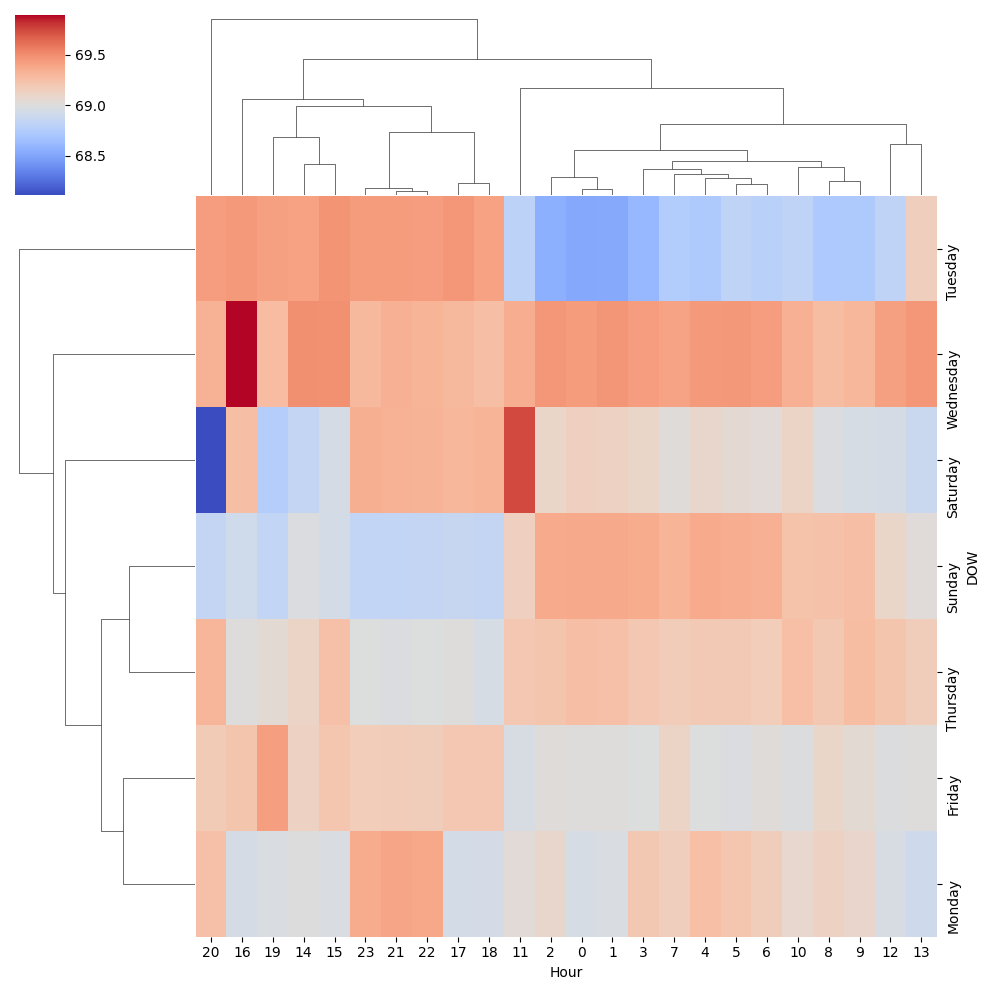

In [6]:
plt.figure(figsize= (15,8))
sns.clustermap(df2,cmap= "coolwarm")

In [7]:

#heatmap cant accept pandaconvert z has to be python list so we are converting it to it
data = [go.Heatmap(x = df2["DOW"], y = df2["Month"], z=df2["segment1(10-30cm)"].values.tolist())]

layout = go.Layout(title="Heatmap Test")

fig = go.Figure(data = data, layout = layout)

pyo.plot(fig)

KeyError: 'DOW'

In [23]:
df2= df.groupby(by = ["DOW", "Hour"]).mean()['segment1(10-30cm)'].unstack()
fig = px.imshow(df2
    )
    
fig.update_xaxes(side="top")
fig.show()

In [25]:
df2.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='DOW')